# Project : Cars4U

## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.


## Objective:

1.  Explore and visualize the dataset.
2.  Build a linear regression model to predict the prices of used cars.
3.  Generate a set of insights and recommendations that will help the business.


## Data Information

Each record in the database provides a description of an anime. Detailed attribute information can be found below.

**Attribute Information**:

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load data

In [3]:
df = pd.read_csv("../Supervised_Learning_Regression/used_cars_data.csv")

In [4]:
# copying the data to another variable to avoid any changes to original data
data2 = df.copy()

In [5]:
# to view first 5 rows of the dataset
data2.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# to view last 5 rows of the dataset
data2.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
data2.shape

(7253, 14)

Observation : There are 7253 rows and 14 columns

In [8]:
print(data2.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Observation : 
* Dependent variable is the price of a car , which is of float type.
* Year,Kilometers_Driven columns are of type int
* Seats column is of type float
* All other columns are of Object type
* There are missing values in Mileage,Engine,Power,Seats, New_Price
              

In [10]:
data2.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Observation : 
* Mileage column has 2 missing values, Engine & Power columns have 46 missing values, Seats have 53 missing values, New_Price has 6247 missing values , Price has 1234 missing values.
* No other column has missing values.

In [11]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [12]:
data2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# filtering non-numeric columns
cat_columns = data2.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [14]:
data2[data2.duplicated(subset = ['S.No.'])]
# data1.drop(["Name"], axis=1, inplace=True)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


Observation : S.No. can be primary key 

## Data Preprocessing

### drop the missing values in the target variable.

In [15]:
data2.dropna(subset=["Price"], inplace=True)

In [16]:
# checking missing values in rest of the data
data2.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [17]:
data2[data2.Mileage.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


### drop the remaining missing values in Mileage column (Since there are only 2 )

In [18]:
data2.dropna(subset=["Mileage"], inplace=True)

In [19]:
data2.reset_index(inplace=True, drop=True)

In [ ]:
### Let us look at the entries with Engine


In [20]:
data2[data2.Engine.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


In [21]:
# checking the summary of the data with missing values in Engine
data2[data2.Engine.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,36.0,NaN,NaN,NaN,2947.166667,1457.666246,194.0,2090.5,2758.5,4171.25,5270.0
Name,36,19,Maruti Swift 1.3 VXi,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,36,11,Pune,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,36.0,NaN,NaN,NaN,2009.222222,4.036343,2001.0,2006.0,2010.0,2012.0,2017.0
Kilometers_Driven,36.0,NaN,NaN,NaN,67745.638889,34038.24421,17941.0,49471.25,63579.0,80250.0,200000.0
Fuel_Type,36,2,Petrol,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,36,2,Manual,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,36,4,First,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,36,12,0.0 kmpl,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove metrics(bhp & km/l) from Engine and Power columns.

In [22]:
data3= data2.copy()
data3["Engine"] = data3["Engine"].str.split(" ").str[0]
data3["Power"] = data3["Power"].str.split(" ").str[0]


In [23]:
np.random.seed(2)  # To get the same random results every time
data3.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4930,4932,Hyundai Grand i10 CRDi Sportz,Kochi,2014,51134,Diesel,Manual,First,24.0 kmpl,1120,70,5.0,NaN,4.72
4758,4759,Honda CR-V 2.4 4WD AT,Jaipur,2006,80000,Petrol,Automatic,Third,10.1 kmpl,2354,152,5.0,NaN,2.00
5745,5747,Maruti Wagon R LXI CNG,Delhi,2014,62549,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,NaN,2.95
4561,4562,Maruti Alto 800 2016-2019 LXI,Chennai,2016,61000,Petrol,Manual,First,24.7 kmpl,796,47.3,5.0,NaN,2.90
3828,3828,Maruti Wagon R LXI,Kochi,2015,50230,Petrol,Manual,First,18.9 kmpl,998,67.1,5.0,NaN,3.87
265,265,Mercedes-Benz New C-Class C 220 CDI CLASSIC,Bangalore,2014,57000,Diesel,Manual,Second,15.8 kmpl,2148,170,5.0,NaN,18.00
213,213,Hyundai Creta 1.6 VTVT S,Delhi,2015,27057,Petrol,Manual,Second,15.29 kmpl,1591,121.3,5.0,NaN,8.15
5457,5459,Mercedes-Benz E-Class Facelift,Bangalore,2014,28000,Diesel,Automatic,First,13.0 kmpl,2987,258,5.0,NaN,31.75
4789,4790,BMW 7 Series 2007-2012 730Ld,Hyderabad,2009,53000,Diesel,Automatic,First,14.49 kmpl,2993,258,5.0,NaN,36.00
2012,2012,Honda City 1.5 S MT,Jaipur,2011,95936,Petrol,Manual,First,17.0 kmpl,1497,118,5.0,NaN,4.10


### Replace misssing values in Engine with column medium

In [24]:

data3["Engine"].fillna(data3.Engine.median(), inplace=True)
data3.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                  42
New_Price            5194
Price                   0
dtype: int64

In [25]:
data3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,6017.0,NaN,NaN,NaN,3008.446236,1737.6982,0.0,1504.0,3008.0,4513.0,6018.0
Name,6017,1874,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6017,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6017.0,NaN,NaN,NaN,2013.358152,3.269967,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6017.0,NaN,NaN,NaN,58742.282034,91283.745583,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6017,4,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6017,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6017,4,First,4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017,442,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,6017,146,1197,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data5= data3.copy()


### Based on the stats above replacing missing values in seats with most freq value 

In [27]:
data5["Seats"].fillna(5.0, inplace=True)


In [28]:
data5.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                   0
New_Price            5194
Price                   0
dtype: int64

In [29]:
np.random.seed(2)  # To get the same random results every time
data5.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4930,4932,Hyundai Grand i10 CRDi Sportz,Kochi,2014,51134,Diesel,Manual,First,24.0 kmpl,1120,70,5.0,NaN,4.72
4758,4759,Honda CR-V 2.4 4WD AT,Jaipur,2006,80000,Petrol,Automatic,Third,10.1 kmpl,2354,152,5.0,NaN,2.00
5745,5747,Maruti Wagon R LXI CNG,Delhi,2014,62549,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,NaN,2.95
4561,4562,Maruti Alto 800 2016-2019 LXI,Chennai,2016,61000,Petrol,Manual,First,24.7 kmpl,796,47.3,5.0,NaN,2.90
3828,3828,Maruti Wagon R LXI,Kochi,2015,50230,Petrol,Manual,First,18.9 kmpl,998,67.1,5.0,NaN,3.87
265,265,Mercedes-Benz New C-Class C 220 CDI CLASSIC,Bangalore,2014,57000,Diesel,Manual,Second,15.8 kmpl,2148,170,5.0,NaN,18.00
213,213,Hyundai Creta 1.6 VTVT S,Delhi,2015,27057,Petrol,Manual,Second,15.29 kmpl,1591,121.3,5.0,NaN,8.15
5457,5459,Mercedes-Benz E-Class Facelift,Bangalore,2014,28000,Diesel,Automatic,First,13.0 kmpl,2987,258,5.0,NaN,31.75
4789,4790,BMW 7 Series 2007-2012 730Ld,Hyderabad,2009,53000,Diesel,Automatic,First,14.49 kmpl,2993,258,5.0,NaN,36.00
2012,2012,Honda City 1.5 S MT,Jaipur,2011,95936,Petrol,Manual,First,17.0 kmpl,1497,118,5.0,NaN,4.10


In [30]:
data5[data5.Power.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,1493.0,NaN,5.0,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,1493.0,NaN,5.0,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,1493.0,NaN,5.0,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,1493.0,NaN,5.0,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,1493.0,NaN,5.0,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,1493.0,NaN,5.0,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,1493.0,NaN,5.0,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,1493.0,NaN,5.0,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,1493.0,NaN,5.0,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,1493.0,NaN,5.0,NaN,1.93


In [31]:
data5.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                   0
New_Price            5194
Price                   0
dtype: int64

In [32]:
data5["Mileage"] = data5["Mileage"].str.split(" ").str[0]

In [33]:
np.random.seed(2)  # To get the same random results every time
data5.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4930,4932,Hyundai Grand i10 CRDi Sportz,Kochi,2014,51134,Diesel,Manual,First,24.0,1120,70,5.0,NaN,4.72
4758,4759,Honda CR-V 2.4 4WD AT,Jaipur,2006,80000,Petrol,Automatic,Third,10.1,2354,152,5.0,NaN,2.00
5745,5747,Maruti Wagon R LXI CNG,Delhi,2014,62549,CNG,Manual,First,26.6,998,58.16,5.0,NaN,2.95
4561,4562,Maruti Alto 800 2016-2019 LXI,Chennai,2016,61000,Petrol,Manual,First,24.7,796,47.3,5.0,NaN,2.90
3828,3828,Maruti Wagon R LXI,Kochi,2015,50230,Petrol,Manual,First,18.9,998,67.1,5.0,NaN,3.87
265,265,Mercedes-Benz New C-Class C 220 CDI CLASSIC,Bangalore,2014,57000,Diesel,Manual,Second,15.8,2148,170,5.0,NaN,18.00
213,213,Hyundai Creta 1.6 VTVT S,Delhi,2015,27057,Petrol,Manual,Second,15.29,1591,121.3,5.0,NaN,8.15
5457,5459,Mercedes-Benz E-Class Facelift,Bangalore,2014,28000,Diesel,Automatic,First,13.0,2987,258,5.0,NaN,31.75
4789,4790,BMW 7 Series 2007-2012 730Ld,Hyderabad,2009,53000,Diesel,Automatic,First,14.49,2993,258,5.0,NaN,36.00
2012,2012,Honda City 1.5 S MT,Jaipur,2011,95936,Petrol,Manual,First,17.0,1497,118,5.0,NaN,4.10


In [34]:
data8= data5.copy()


In [35]:
data8.Power.describe()

count     5981
unique     371
top         74
freq       235
Name: Power, dtype: object

### Based on the stats above replacing missing values in Power column with most freq value 

In [36]:
data8["Power"].fillna("235", inplace=True)

In [37]:
data8.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5194
Price                   0
dtype: int64

### Create one hot encoded columns for Fuel_Type

In [38]:
data10 = pd.get_dummies(data8, columns=['Fuel_Type'])
data10.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Manual,First,26.6,998,58.16,5.0,NaN,1.75,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,0,1,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,0,0,0,1
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,0,1,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,0,1,0,0


In [39]:
data10.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
395,395,Maruti Ritz LDi,Coimbatore,2011,90207,Manual,First,21.1,1248,73.9,5.0,NaN,3.91,0,1,0,0
2883,2883,Tata Venture EX,Pune,2011,51482,Manual,First,15.42,1405,70,8.0,NaN,2.50,0,1,0,0
794,794,Hyundai i20 Magna 1.2,Mumbai,2018,19500,Manual,First,18.6,1197,81.83,5.0,NaN,5.85,0,0,0,1
5208,5210,Ford Figo Diesel Titanium,Chennai,2012,82000,Manual,First,20.0,1399,68.05,5.0,NaN,2.95,0,1,0,0
5773,5775,BMW 6 Series Gran Coupe,Mumbai,2013,30000,Automatic,First,17.54,2993,313,4.0,NaN,45.00,0,1,0,0
3792,3792,Hyundai EON Era,Hyderabad,2016,30000,Manual,First,21.1,814,55.2,5.0,NaN,3.25,0,0,0,1
1889,1889,Honda City i VTEC SV,Mumbai,2015,73070,Manual,First,17.4,1497,117.3,5.0,NaN,5.90,0,0,0,1
5479,5481,Chevrolet Cruze LTZ AT,Hyderabad,2011,78203,Automatic,First,18.1,1991,147.9,4.0,NaN,5.50,0,1,0,0
4979,4981,Honda Jazz VX,Chennai,2017,8000,Manual,First,18.2,1199,88.7,5.0,9.1 Lakh,7.90,0,0,0,1
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Manual,First,0.0,1590,null,5.0,NaN,1.30,0,0,0,1


### convert string colums to numeric & replace null values(Power) and 0(Mileage) with respective columns median 

In [40]:
def Obj_to_num(Obj_val):
    """This function takes in a string 
    and converts it to a number."""
    if isinstance(Obj_val, str):  # checks if `Obj_val` is a string
        multiplier = 1  
        return float(Obj_val.replace("null", "235").replace("0.0", "35")) * multiplier
    else:  
        return np.nan

In [41]:
data10["Power"] = data10["Power"].apply(Obj_to_num)

In [42]:
data10.drop(data10[data10['Power'] == 0].index, inplace = True)

In [43]:
data10.reset_index(inplace=True, drop=True)

In [44]:
data10["Engine"] = data10["Engine"].apply(Obj_to_num)

In [45]:
data10["Mileage"] = data10["Mileage"].apply(Obj_to_num)

### Drop name column as it is text

In [46]:
data10.drop(["Name"], axis=1, inplace=True)

### Drop New Price as there are too many missing values  

In [47]:
data10.drop(["New_Price"], axis=1, inplace=True)

In [48]:
data10["Engine"].fillna(data10.Engine.median(), inplace=True)

In [49]:
data10.isnull().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Fuel_Type_CNG        0
Fuel_Type_Diesel     0
Fuel_Type_LPG        0
Fuel_Type_Petrol     0
dtype: int64

### Drop S.No is it does not give much info

In [50]:
data10.drop(["S.No."], axis=1, inplace=True)

### Univariate Analysis

In [51]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### *Price* (the target variable)

In [52]:
data10["Price"].describe()

count    6017.000000
mean        9.478340
std        11.189605
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

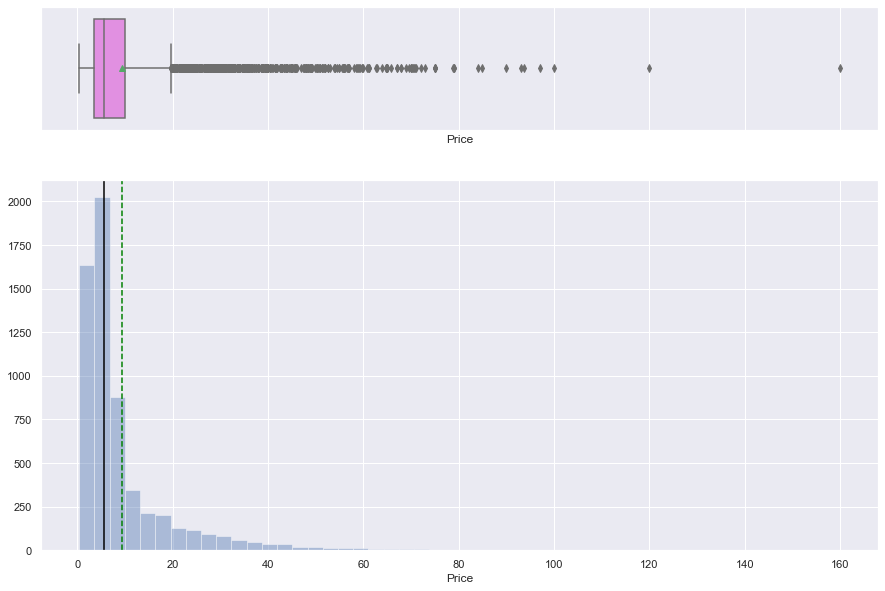

In [53]:
histogram_boxplot(data10["Price"])

#### Observation :The distribution is right-skewed with a median runtime of less than 10 

In [54]:
data10["Kilometers_Driven"].describe()


count    6.017000e+03
mean     5.874228e+04
std      9.128375e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

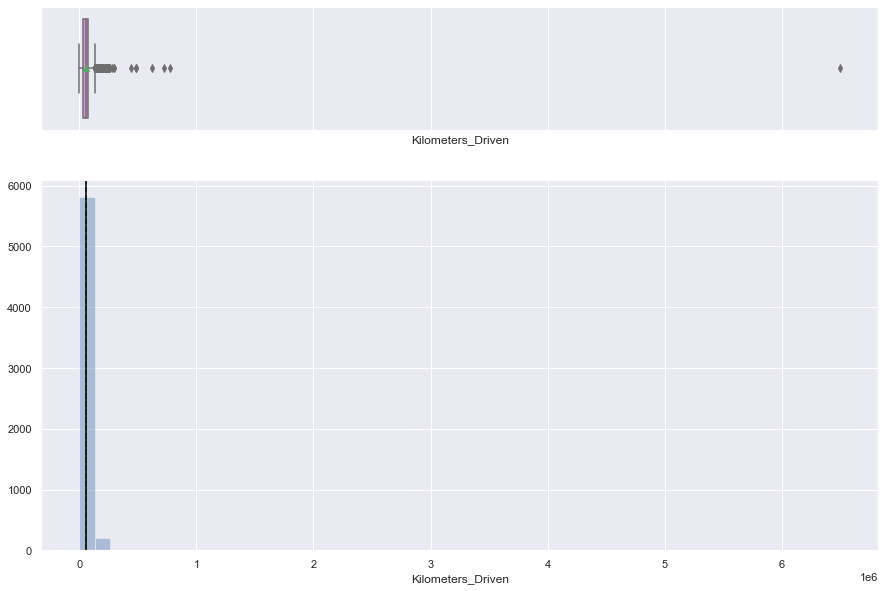

In [55]:
histogram_boxplot(data10["Kilometers_Driven"])

In [90]:
#### Observation :The distribution is right-skewed 

In [91]:
data10["Seats"].describe()

count    6017.000000
mean        5.276882
std         0.806464
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

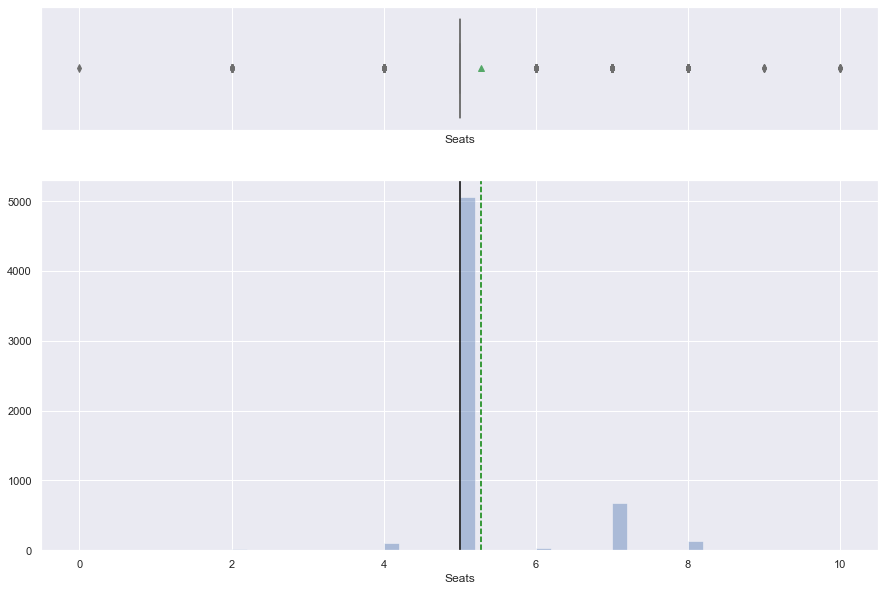

In [57]:
histogram_boxplot(data10["Seats"])

#### Observation :The distribution is relatively even

In [58]:
data10["Power"].describe()

count    6017.000000
mean      118.585654
std       143.445605
min        34.200000
25%        78.000000
50%        98.600000
75%       140.000000
max      7352.000000
Name: Power, dtype: float64

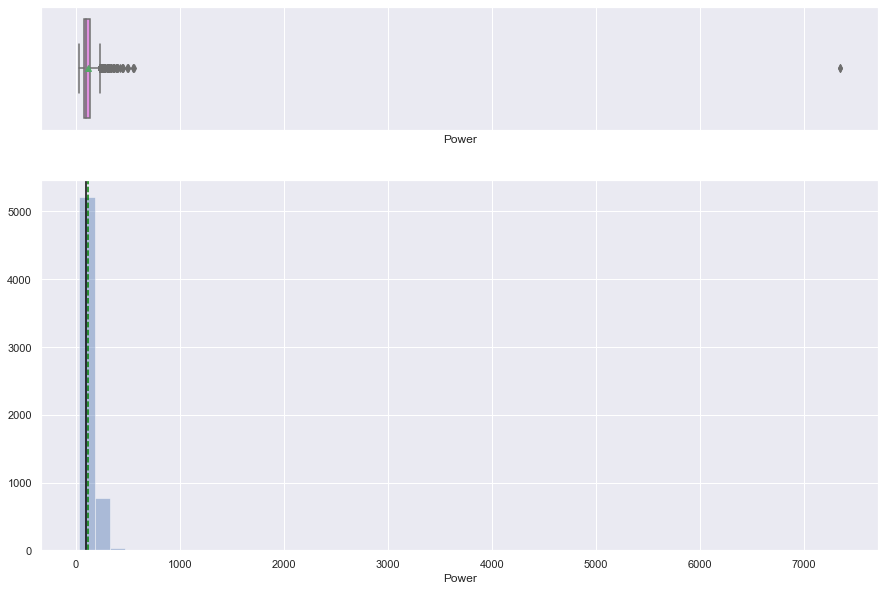

In [59]:
histogram_boxplot(data10["Power"])

#### Observation :The distribution is right-skewed 

In [60]:
data10["Engine"].describe()

count    6017.000000
mean     1620.737078
std       599.398319
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

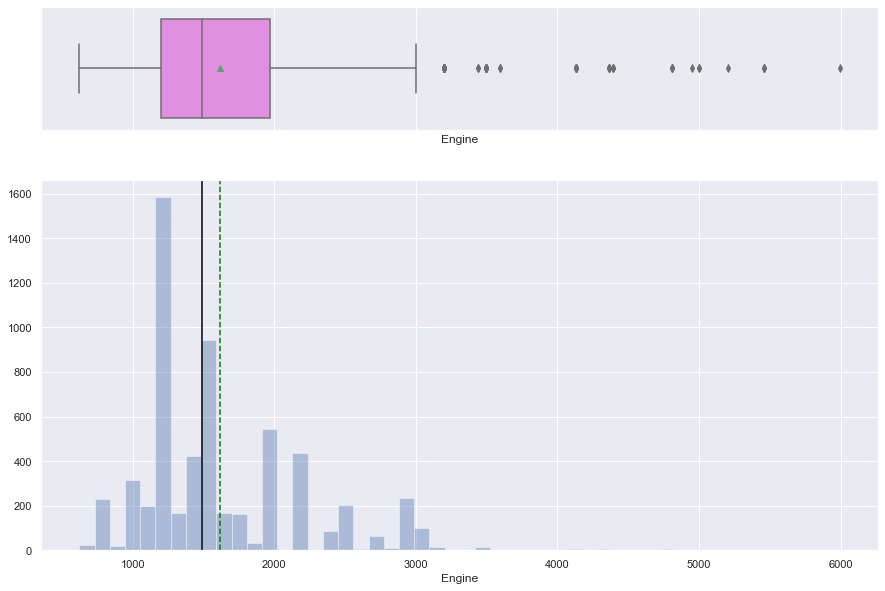

In [61]:
histogram_boxplot(data10["Engine"])

#### Observation :The distribution is right-skewed 

In [62]:
data10["Mileage"].describe()

count    6017.000000
mean       21.275230
std        24.253446
min         6.400000
25%        15.400000
50%        18.480000
75%        21.500000
max       235.000000
Name: Mileage, dtype: float64

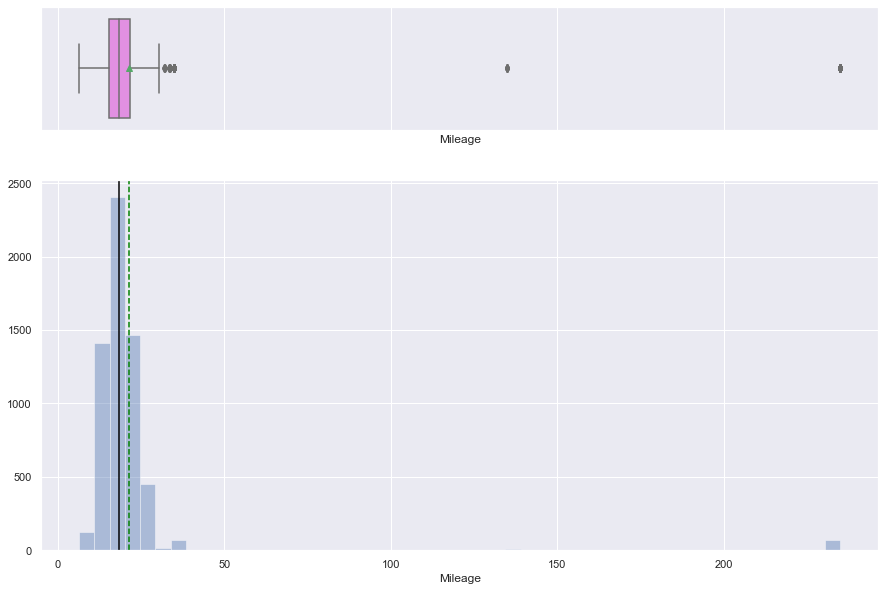

In [63]:
histogram_boxplot(data10["Mileage"])

#### Observation :The distribution is more even

In [64]:
data10["Year"].describe()

count    6017.000000
mean     2013.358152
std         3.269967
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

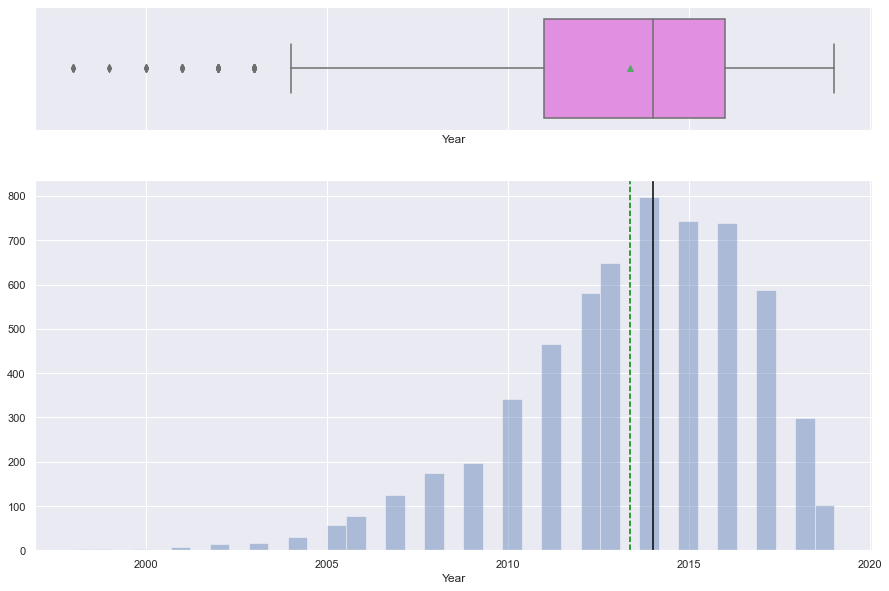

In [65]:
histogram_boxplot(data10["Year"])

#### Observation :The distribution is left-skewed with a median at 2013

['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


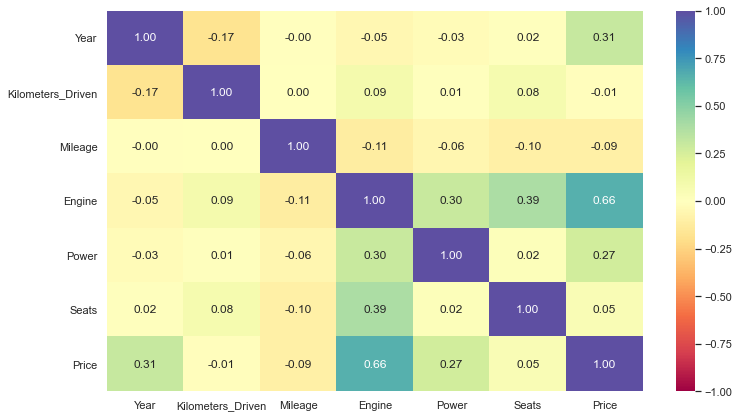

In [66]:
corr_cols = [item for item in data10.columns if "Fuel" not in item]
print(corr_cols)
plt.figure(figsize=(12, 7))
sns.heatmap(
    data10[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation :There is no high correlation between columns

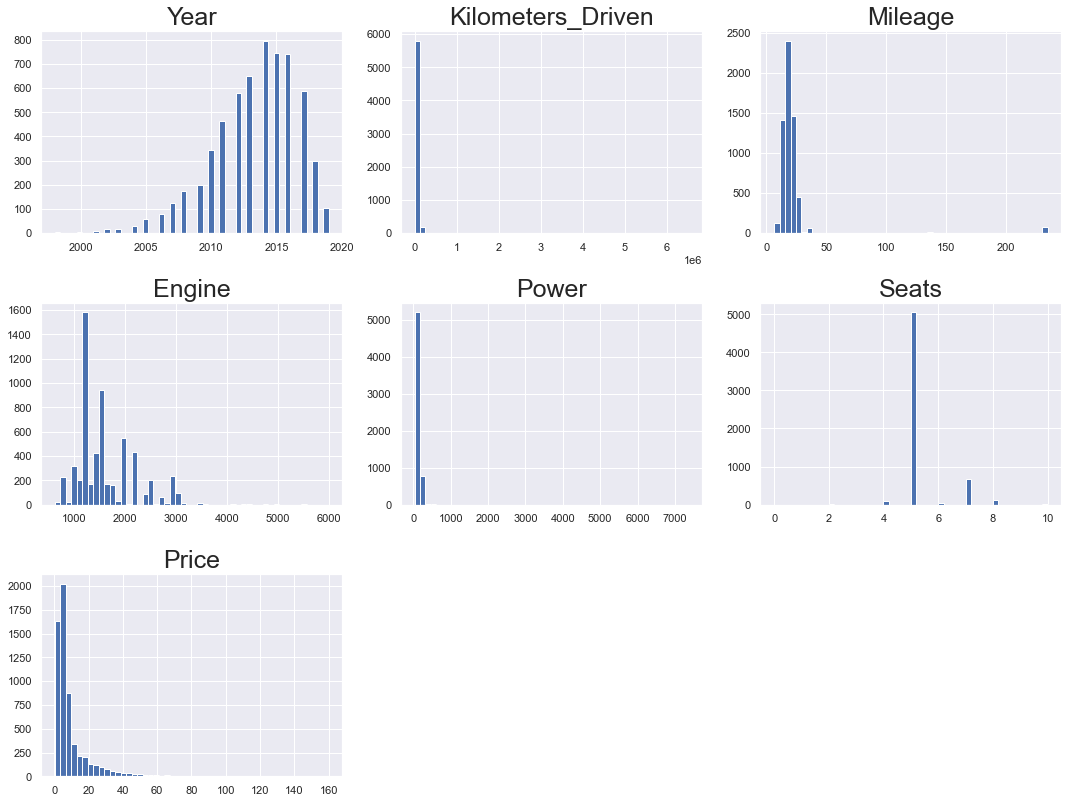

In [67]:
# creating a list of  columns
dist_cols = [
    item for item in data10.select_dtypes(include=np.number).columns if "Fuel" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data10[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### We see that most of the columns have a very skewed distribution.
#### We will apply the log transformation to all but the Seats , Mileage .

In [68]:
# creating a copy of the dataframe
df4 = data10.copy()

# removing  Seats columns 
dist_cols.remove("Seats")

# also dropping the Mileage column as it is almost normally distributed
dist_cols.remove("Mileage")

In [69]:
for col in dist_cols:
    df4[col + "_log"] = np.log(df4[col] + 1)

# dropping the original columns
df4.drop(dist_cols, axis=1, inplace=True)
df4.head()

,Location,Transmission,Owner_Type,Mileage,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
0,Mumbai,Manual,First,26.60,5.0,1,0,0,0,7.606387,11.184435,6.906755,4.080246,1.011601
1,Pune,Manual,First,19.67,5.0,0,1,0,0,7.608871,10.621352,7.367077,4.845761,2.602690
2,Chennai,Manual,First,18.20,5.0,0,0,0,1,7.606885,10.736418,7.090077,4.496471,1.704748
3,Chennai,Manual,First,20.77,7.0,0,1,0,0,7.607381,11.373675,7.130099,4.497139,1.945910
4,Coimbatore,Automatic,Second,15.20,5.0,0,1,0,0,7.607878,10.613271,7.585281,4.954418,2.930660


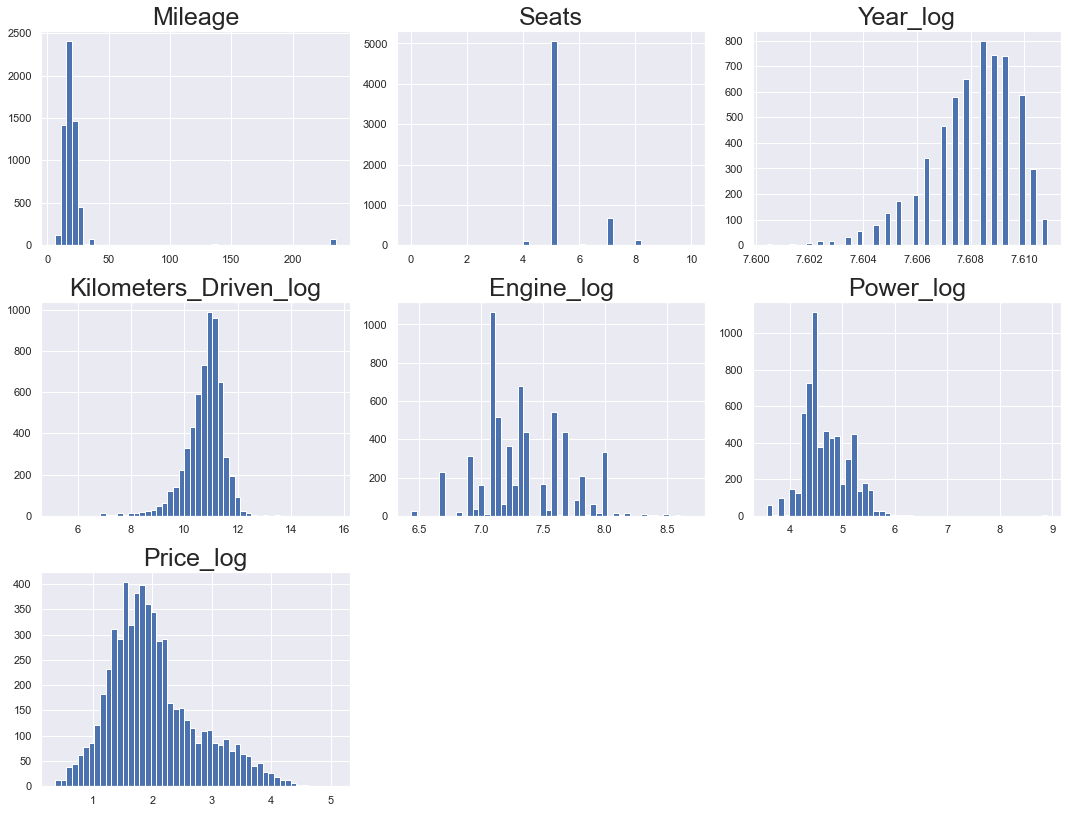

In [70]:
dist_cols = [
    item for item in df4.select_dtypes(include=np.number).columns if "Fuel" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df4[dist_cols[i]], bins=50)
    # sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### The columns are still skewed, but not as heavily as before.

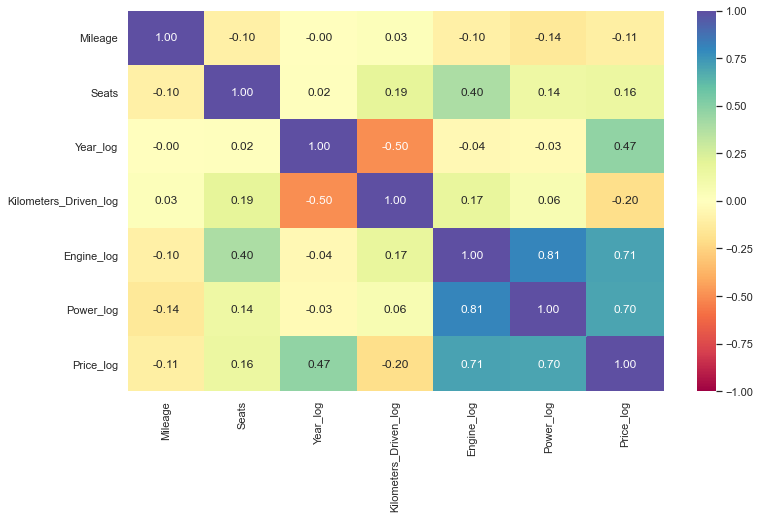

In [71]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df4[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### There is higher correlation now after transformation but not high enough to drop those columns

In [72]:
df4.shape

(6017, 14)

## Model Building

In [73]:
ind_vars = df4.drop(["Price_log"], axis=1)
dep_var = df4[["Price_log"]]

In [74]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Mileage,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,26.60,5.0,1,0,0,0,7.606387,11.184435,6.906755,4.080246,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,19.67,5.0,0,1,0,0,7.608871,10.621352,7.367077,4.845761,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,18.20,5.0,0,0,0,1,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,20.77,7.0,0,1,0,0,7.607381,11.373675,7.130099,4.497139,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,15.20,5.0,0,1,0,0,7.607878,10.613271,7.585281,4.954418,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [75]:
ind_vars_num.shape

(6017, 24)

In [76]:
ind_vars_num.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Mileage,6017.0,21.275230,24.253446,6.400000,15.400000,18.480000,21.500000,235.000000
Seats,6017.0,5.276882,0.806464,0.000000,5.000000,5.000000,5.000000,10.000000
Fuel_Type_CNG,6017.0,0.009307,0.096031,0.000000,0.000000,0.000000,0.000000,1.000000
Fuel_Type_Diesel,6017.0,0.532657,0.498974,0.000000,0.000000,1.000000,1.000000,1.000000
Fuel_Type_LPG,6017.0,0.001662,0.040737,0.000000,0.000000,0.000000,0.000000,1.000000
Fuel_Type_Petrol,6017.0,0.456374,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
Year_log,6017.0,7.608055,0.001624,7.600402,7.606885,7.608374,7.609367,7.610853
Kilometers_Driven_log,6017.0,10.758813,0.715854,5.147494,10.434145,10.878066,11.198228,15.687313
Engine_log,6017.0,7.331898,0.336816,6.437752,7.089243,7.309212,7.585789,8.699348
Power_log,6017.0,4.669121,0.432850,3.561046,4.369448,4.601162,4.948760,8.902864


In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [78]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in train data = 1806


In [79]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [80]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.001048
Seats,-0.046311
Fuel_Type_CNG,0.025096
Fuel_Type_Diesel,0.068370
Fuel_Type_LPG,0.025506
Fuel_Type_Petrol,-0.118973
Year_log,179.166441
Kilometers_Driven_log,-0.112085
Engine_log,0.876606
Power_log,0.392014


### Coefficient interpretations
#### Coefficients of log of Engine, log of Power, some of the FuelType LNG  Diesel columns  some of the Location columns, etc. are positive. Increase in these will lead to an increase in the price of a car
#### Coefficients of *Manual Transmission*, *Kilometers driven*, some of the *Location* columns, some of the *mediaType* columns, all of the *Owner* columns, etc. are negative.Increase in these will lead to a decrease in the price of a car.



In [103]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [82]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE      MAE       R^2  Adjusted R^2
0  0.273382  0.20762  0.866923       0.86616


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.285302  0.212438  0.853449      0.851474


**Observations**

- The train and test $R^2$ are 0.86 and 0.85, indicating that the model explains 86% and 85% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict car prices within a mean error of 0.212 on the test set.



## Conclusions

- We have been able to build a predictive model that can be used by Cars4U to predict the price of an car with an $R^2$ of 0.86 on the training set.


- Cars4U can use this model to predict the car prices  within a mean error of 0.212 on the test set.


- Engine, Power, FuelType of  LNG &  Diesel are some of the factors which tend to increase the price of an car.


-  Manual Transmission, Kilometers driven, some  Locations , as well as Used cars are some of the factors which tend to decrease the rating of an anime.


